# Numpy basics: Arrays and vectorized computation

> numpy arrays are _much_ faster than their python counterparts, even 10-100 times so.

ndarray has lots of overloaded operators to operate on matrixes.

ndarray (n-dimensional array) always contains homogeneous data

In [4]:
import numpy as np
rows = 2
cols = 3
data = np.random.randn(rows,cols)
data

array([[ 0.17086916,  0.32170097,  1.03429932],
       [-2.04742196, -0.40180715, -0.44166454]])

In [5]:
data * 10

array([[  1.70869164,   3.21700973,  10.34299324],
       [-20.47421964,  -4.0180715 ,  -4.4166454 ]])

In [6]:
data + data

array([[ 0.34173833,  0.64340195,  2.06859865],
       [-4.09484393, -0.8036143 , -0.88332908]])

It is possible to query the ndarray for some basic properties:
* ndim: number of dimensions
* shape: dimensionality of the array
* dtype: type of the content

In [10]:
data.ndim

2

In [8]:
data.shape

(2, 3)

In [9]:
data.dtype

dtype('float64')

## Some useful functions
* zeros (initialize to 0)
* ones (initialize to 1)
* empty (initialize to None or garbage values, keeping in mind it is a C datastruct after all)
* eye / identity (create the identity matrix)
* arange (python range function)

In [12]:
np.zeros(3)

array([0., 0., 0.])

In [15]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

# types!
You can force the ndarray to be of a certain type, instead of letting it be inferred by the interpreter. 
Most of the common types you'd find in C seem to be supported, with the addition of "complex" to represent complex numbers.

In [18]:
np.array([1,2,3], dtype=np.int32)

array([1, 2, 3], dtype=int32)

In [20]:
np.array([1j,2j,3j], dtype=np.complex256)

array([0.+1.j, 0.+2.j, 0.+3.j], dtype=complex256)

## Casts
If needed, you can also cast one array into an array of another dtype by using `astype`

In [21]:
np.arange(10).astype(np.float64)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Vectorization
Vectorization is essentially, from my understanding, just a loop over all elements in a matrix and applying some operation to them. 
ndarrays apply these element-wise. 

I _think_ I can just keep in mind the basic matrix arithmatic techniques and numpy should follow them.

Operations on differently-sized matrices is called 'broadcasting' but will be discussed in Apendix A.

## indexing and slicing
For 1-d arrays this is the same as in vanilla Python, with the exception that the operations mutate the original array whereas in python they'd create copies. You could say they create *views* on the data. 

In [23]:
array = np.arange(10)
array[:] = 64
array

array([64, 64, 64, 64, 64, 64, 64, 64, 64, 64])

In [25]:
sliced = array[4:6]
sliced[:] = 0
array

array([64, 64, 64, 64,  0,  0, 64, 64, 64, 64])

*** Numpy was designed to work on large sets of data, hence why it mutates data in-place rather than creating copies. But you can always force numpy to create a copy. *** 

In [27]:
copy_slice = array[1:3].copy()
copy_slice

array([64, 64])

### slicing and indexing in multidimensional arrays
Seems pretty similar at first sight to how most langs would handle it, but they add some syntactic sugar

In [34]:
arr = np.array([[1,2,3],[4,5,6]])
print(arr[0][2])
print(arr[0,2])

3
3


### Boolean indexing
It is possible to use boolean values to retrieve data from a matrix. When the indice corresponds to 'True' in the bool matrix, then the value remains. Essentially you are applying a filter over a matrix. 

## Transposing:
Transposing is quite easy, as expected since it's a common transformation. 

In [37]:
array = np.arange(15).reshape(3,5)
array

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [38]:
array.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Alternatively, you can use the `transpose` function. OR, you could use the `swapaxes` function since a transpose in 2 dimensions is the same as just swapping the axes anyway. :)

In [39]:
array.transpose()

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

# 4.2: Universal functions
> A function that performs element-wise operations on data in an ndarray. Vectorized wrappers that take scalar values as input and produce a scalar value as an output

But more clearly in my own words: aggregate functions taking parameters. 

In [42]:
np.sum(array)

105

## 4.3 Array-Oriented programming with Arrays
_That is kind of a tautology, no?_

In [47]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points. like np.linspace
xs, ys = np.meshgrid(points, points) # meshgrid: take 2 1d arrays and turn it into a 2d matrix

In [48]:
z = np.sqrt(xs ** 2 + ys ** 2)

<module 'matplotlib.pyplot' from '/home/dylan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

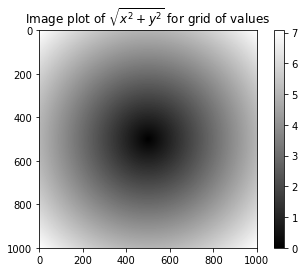

In [50]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for grid of values")
plt